# 1.2 Ordinary Differential Equations

## 2.1 Stability
To do:
- Tabulate values 
- Error oscillates with maginitude proportional to $e^{\gamma x}$, estimate the growth rate $\gamma$ (take logs?)
- Do again for $h = 0.4,0.25,0.125,0.1$
- How does reducing $h$ effect growth rate?
- Solve the difference equation (7)
- Use this to explain why (and when) instability occurs, and with what growth rate
- Show that in the limit $ h \to 0 $, $ n \to \infty $ with $ x_{n} = nh $ fixed, the solutions converge

## Question 1

The example we will study is 

$$ \frac{d y}{d x} = -16y + 15e^{-x}, \quad y(0) = 0 \qquad (1) $$

### Programming Task

The program to implement the forward Euler method for equation (1) is shown at the end of the notebook, labelled


```forward_Euler_method(h=0.6)```

In [29]:
def plot_solution(h, method = 'E'):
    if method == 'E':
        x = forward_Euler_method(h)['x_values'].values[1:]
        Y = forward_Euler_method(h)['$Y_n$ Numerical Solution'].values[1:]
        y = forward_Euler_method(h)['$y(x_n)$ Exact Solution'].values[1:]
    elif method == 'RK':
        x = runge_Kutta_method(h)['x_values'].values[1:]
        Y = runge_Kutta_method(h)['$Y_n$ Numerical Solution'].values[1:]
        y = runge_Kutta_method(h)['$y(x_n)$ Exact Solution'].values[1:]
    plt.plot(x, Y, 'r',x,y,'b--')

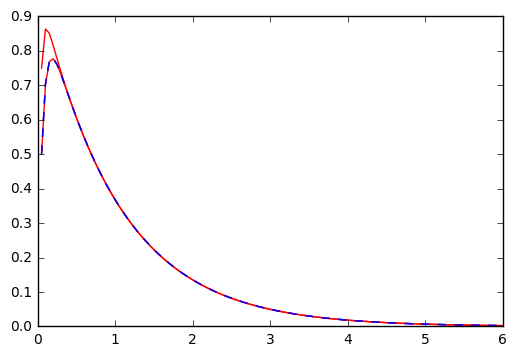

In [37]:
plot_solution(0.05, method='E')
plot_solution(0.05,method='RK')

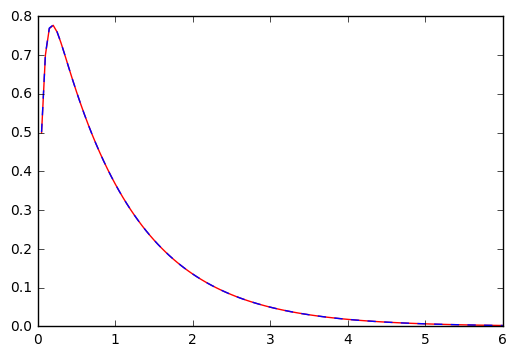

In [24]:
def plot_growth_rate(h):
    x = forward_Euler_method(h)['x_values'].values[1:]
    error_magnitude = abs(forward_Euler_method(h)['Global Error $E_n$']).values
    errs = list(map(math.log,error_magnitude[1:]))
    plt.plot(x, errs)
    m = (errs[5]-errs[1])/(x[5] - x[1])
    print('Growth rate estimate: Gamma = {}'.format(m))
def plot_growth_rate_nolog(h):
    x = forward_Euler_method(h)['x_values'].values[1:]
    error_magnitude = abs(forward_Euler_method(h)['Global Error $E_n$']).values
    errs = error_magnitude[1:]
    plt.plot(x, errs)
    #m = (errs[5]-errs[1])/(x[5] - x[1])

In [23]:
plot_growth_rate(h=0.05)

NameError: name 'plot_growth_rate' is not defined

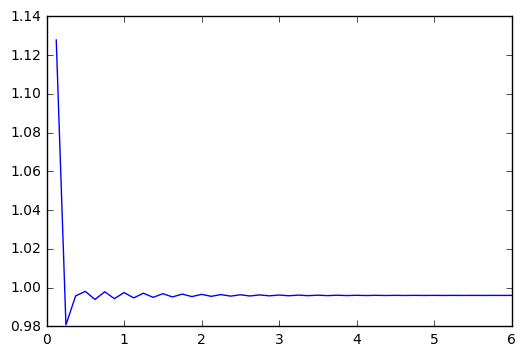

In [52]:
plot_growth_rate_nolog(0.125)

In [15]:
forward_Euler_method(0.1, suppress=True)

,$Y_n$ Numerical Solution,$y(x_n)$ Exact Solution,Global Error $E_n$,x_values
0,0.000000,0.000000,0.000000,0.0
1,0.298056,0.301194,0.003138,1.2
2,0.090422,0.090718,0.000296,2.4
3,0.027236,0.027324,0.000088,3.6
4,0.008203,0.008230,0.000026,4.8
5,0.002471,0.002479,0.000008,6.0


In [16]:
runge_Kutta_method(0.1,suppress=True)

,$Y_n$ Numerical Solution,$y(x_n)$ Exact Solution,Global Error $E_n$,x_values
0,0.000000,0.000000,0.000000,0.0
1,0.301389,0.301194,-0.000195,1.2
2,0.090777,0.090718,-0.000059,2.4
3,0.027341,0.027324,-0.000018,3.6
4,0.008235,0.008230,-0.000005,4.8
5,0.002480,0.002479,-0.000002,6.0


In [34]:
forward_Euler_method(0.2, suppress=True)

,$E_n$ Global Error,$Y_n$ Analytical Solution,$y(x_n)$ Numerical Solution,x_values
0,0.000000e+00,0.000000,0.000000e+00,0.0
1,1.126783e+02,0.301194,-1.123771e+02,1.2
2,1.277524e+04,0.090718,-1.277515e+04,2.4
3,1.448455e+06,0.027324,-1.448455e+06,3.6
4,1.642257e+08,0.008230,-1.642257e+08,4.8
5,1.861990e+10,0.002479,-1.861990e+10,6.0


In [33]:
forward_Euler_method(0.125, suppress=True)

,$E_n$ Global Error,$Y_n$ Analytical Solution,$y(x_n)$ Numerical Solution,x_values
0,0.000000,0.000000,0.000000,0.000
1,-0.994725,0.324652,1.319377,1.125
2,0.996437,0.105399,-0.891038,2.250
3,-0.995881,0.034218,1.030099,3.375
4,0.996062,0.011109,-0.984953,4.500
5,-0.996003,0.003607,0.999610,5.625


In [36]:
forward_Euler_method(0.1, suppress=True)

,$E_n$ Global Error,$Y_n$ Analytical Solution,$y(x_n)$ Numerical Solution,x_values
0,0.000000,0.000000,0.000000,0.0
1,0.003138,0.301194,0.298056,1.2
2,0.000296,0.090718,0.090422,2.4
3,0.000088,0.027324,0.027236,3.6
4,0.000026,0.008230,0.008203,4.8
5,0.000008,0.002479,0.002471,6.0


### Question 2

(i) To find the solution of 

$$  Y_{n+1} + (16h - 1)Y_{n} = 15h (e^{-h})^{n}  $$

In the homogenous case, ansatz $ Y_{n} = k^{n}, k \neq 0 $, which yields $ k = (1 - 16h) $. For the particular integral, we ansatz $  y_{n}^{p} = C (e^{-h})^{n} $, determining the constant $ C $ to be $ 15h / (e^{-h} + 16h - 1 ) $. Use yo = 0, and the solution is given by

$$ Y_{n} = \frac{15 h}{e^{-h}  - 1 + 16h }  \left(  (e^{-h})^{n} - (1 - 16h)^{n}  \right) $$

(ii) Hence, for $h \geq 0.125 $, the $ (1 - 16h)^n $ becomes unweildy as $n \to \infty $

(iii)

In the limit $h \to 0 $, 

$$ \frac{15 h}{e^{-h}  - 1 + 16h } \to  \frac{15}{-e^{-h}  + 16 } = 1$$

by L'Hopital's rule, and as $n \to \infty$,

$$ \left( 1 - \frac{16x_n}{n} \right)^{n} \to e^{-16x_n}, \quad (e^{-x_n/n})^{n} \to e^{x_n} $$

Hence 

$$ Y_n \to e^{-x_{n}} - e^{-16x_{n}} $$

as required



### Question 3

In [21]:
forward_Euler_method(h=0.05, suppress=True, last = 4)

,$Y_n$ Numerical Solution,$y(x_n)$ Exact Solution,Global Error $E_n$,x_values
0,0.000000,0.000000,0.000000,0.0
1,0.300701,0.301194,0.000493,1.2
2,0.090569,0.090718,0.000148,2.4
3,0.027279,0.027324,0.000045,3.6


In [22]:
runge_Kutta_method(h=0.05, suppress=True, last = 4)

,$Y_n$ Numerical Solution,$y(x_n)$ Exact Solution,Global Error $E_n$,x_values
0,0.000000,0.000000,0.000000e+00,0.0
1,0.301202,0.301194,-7.812385e-06,1.2
2,0.090720,0.090718,-2.353234e-06,2.4
3,0.027324,0.027324,-7.087804e-07,3.6


In [1]:
#imports
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def forward_Euler_method(h, suppress = False, last = 6):
    #Defining f
    def f(x,y):
        return -16* y + 15 * math.exp(-x)
    #Defining Analytical Solution
    def y(x):
        return math.exp(-x) - math.exp(-16*x)

    #initial conditions
    x_init=0
    y_init=0
    
    x_values = [x_init]
    Y_values = [y_init]


    #compute next step until x = 6
    i=0
    while (i+1)*h <= last:
        x_values.append(
            (i+1)*h)
        Y_values.append(
            Y_values[i] + h * f(x_values[i],Y_values[i])
        )
        i += 1


    ys = []
    for xval in x_values:
        ys.append(y(xval))

    error = []
    for i in range(len(x_values)):
        error.append( ys[i] - Y_values[i] )
        
    #provide only judicious output    
    if suppress == True:
        a = math.floor(6/(h*5))
        ys = ys[::a]
        x_values = x_values[::a]
        Y_values = Y_values[::a]
        error = error[::a]

    df = pd.DataFrame( 
        {'x_values': x_values,
        '$Y_n$ Numerical Solution': Y_values,
        '$y(x_n)$ Exact Solution':ys,
        'Global Error $E_n$'  : error}
    )
    return df

In [71]:
def question_4(method = 'E'):
    ks = []
    global_error = []

    for k in range(0,16):
        n= 2**k
        h = (0.1/n)

        ks.append(k)
        if method == 'E':
            global_error.append(forward_Euler_method(h, last = 0.1)['Global Error $E_n$'].values[-1])
        elif method == 'RK':
            global_error.append(runge_Kutta_method(h, last = 0.1)['Global Error $E_n$'].values[-1])

    df = pd.DataFrame( 
        {'k': ks,
        'Global Error $E_n$ at 0.1'  : global_error}
    )
    return df




In [73]:
question_4(method='RK')

,Global Error $E_n$ at 0.1,k
0,6.809224e-02,0
1,2.148308e-03,1
2,9.540673e-05,2
3,5.037317e-06,3
4,2.894705e-07,4
5,1.734924e-08,5
6,1.061858e-09,6
7,6.567513e-11,7
8,4.083067e-12,8
9,2.542411e-13,9


In [18]:
def runge_Kutta_method(h, suppress = False, last = 6):
    #Defining f
    def f(x,y):
        return -16* y + 15 * math.exp(-x)
    #Defining Analytical Solution
    def y(x):
        return math.exp(-x) - math.exp(-16*x)

    #initial conditions
    x_init=0
    y_init=0
    
    x_values = [x_init]
    Y_values = [y_init]


    #compute next step until x = 6
    i=0
    while (i+1)*h <= last:
        x_values.append(
            (i+1)*h)
        
        k1 = h * f(x_values[i],Y_values[i])
        k2 = h * f(x_values[i] + h/2,Y_values[i] + k1/2)
        k3 = h * f(x_values[i] + h/2,Y_values[i] + k2/2)
        k4 = h * f(x_values[i] + h,Y_values[i] + k3)
        Y_values.append(
            Y_values[i] + (k1 + 2*k2 + 2*k3 + k4) * 1/6
        )
        i += 1


    ys = []
    for xval in x_values:
        ys.append(y(xval))

    error = []
    for i in range(len(x_values)):
        error.append( ys[i] - Y_values[i] )
        
    if suppress == True:
        a = math.floor(6/(h*5))
        ys = ys[::a]
        x_values = x_values[::a]
        Y_values = Y_values[::a]
        error = error[::a]

    df = pd.DataFrame( 
        {'x_values': x_values,
        '$Y_n$ Numerical Solution': Y_values,
        '$y(x_n)$ Exact Solution':ys,
        'Global Error $E_n$'  : error}
    )
    return df

In [59]:
def question_4(method = 'E'):
    #Defining f
    def f(x,y):
        return -16* y + 15 * math.exp(-x)
    #Defining Analytical Solution
    def y(x):
        return math.exp(-x) - math.exp(-16*x)

    #initial conditions
    x_init=0
    y_init=0
    
    ks = []
    global_error = []
    
    for k in range(0,16):
        n= 2**k
        h = (0.1/n)
        
        ks.append(k)
        
        
        x_values = [x_init]
        Y_values = [y_init]
        ys = []
        error = []
    
        #compute next step until x = 0.1
        i=0
        if method == 'E':
            while (i+1)*h <= 0.1:
                x_values.append(
                    (i+1)*h)
                Y_values.append(
                    Y_values[i] + h * f(x_values[i],Y_values[i])
                )
                i += 1
        elif method == 'RK':
            while (i+1)*h <= 0.1:
                x_values.append(
                    (i+1)*h)

                k1 = h * f(x_values[i],Y_values[i])
                k2 = h * f(x_values[i] + h/2,Y_values[i] + k1/2)
                k3 = h * f(x_values[i] + h/2,Y_values[i] + k2/2)
                k4 = h * f(x_values[i] + h,Y_values[i] + k3)
                Y_values.append(
                    Y_values[i] + (k1 + 2*k2 + 2*k3 + k4) * 1/6
                )
                i += 1

            
        for xval in x_values:
            ys.append(y(xval))

    
        for i in range(len(x_values)):
            error.append( ys[i] - Y_values[i] )
            
        global_error.append(error[-1])

    df = pd.DataFrame( 
        {'k': ks,
        'Global Error $E_n$ at 0.1'  : global_error}
    )
    return df

Display judicious selection of output table?
Select columns by... number?

In [8]:
ys = [1,0]*6

In [12]:
ys[::3]

[1, 0, 1, 0]

In [78]:
forward_Euler_method(h=0.1).head()

,$E_n$ Global Error,$Y_n$ Analytical Solution,$y(x_n)$ Numerical Solution,x_values
0,0.000000,0.000000,0.000000,0.0
1,-0.797059,0.702941,1.500000,0.1
2,0.320712,0.777969,0.457256,0.2
3,-0.221154,0.732588,0.953742,0.3
4,0.129677,0.668658,0.538982,0.4


In [46]:
#x_values, Y_values

In [70]:
df

,$E_n$ Global Error,$Y_n$ Analytical Solution,$y(x_n)$ Numerical Solution,x_values
0,0.000000e+00,0.000000,0.000000e+00,0.0
1,-8.451256e+00,0.548744,9.000000e+00,0.6
2,7.276189e+01,0.301194,-7.246070e+01,1.2
3,-6.257074e+02,0.165299,6.258727e+02,1.8
4,5.381108e+03,0.090718,-5.381018e+03,2.4
5,-4.627752e+04,0.049787,4.627757e+04,3.0
6,3.979867e+05,0.027324,-3.979866e+05,3.6
7,-3.422685e+06,0.014996,3.422685e+06,4.2
8,2.943509e+07,0.008230,-2.943509e+07,4.8
9,-2.531418e+08,0.004517,2.531418e+08,5.4


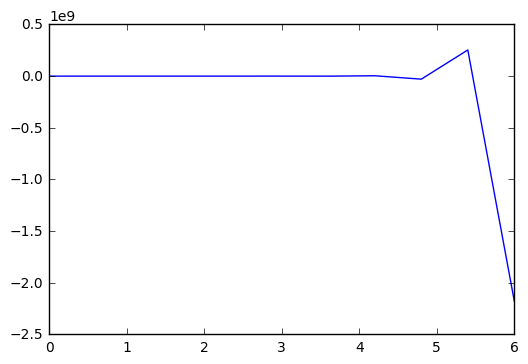

In [45]:
plt.plot(x_values,Y_values)

## Question 2

To find the analytical solution of the Euler _difference_ equation:

$$ Y_{n+1} = Y_{n} + h \left( -16 Y_{n} + 15 \left(  e^{-h} \right)^{n}  \right) \text{ with }Y_0 = 0 $$

## Question 3

In [80]:
def RK4_method(i=0,x_init=0,y_init=0,h=0.05):
    #Defining f and y
    def f(x,y):
        return -16* y + 15 * math.exp(-x)

    def y(x):
        return math.exp(-x) - math.exp(-16*x)

    #initial conditions
    i=0
    x_values = [x_init]
    Y_values = [y_init]

    #set step size
    last = 4


    #compute next step until x = 6
    while (i+1)*h <= last:
        x_values.append(
            (i+1)*h)
        k1 = h * f(x_values[i],Y_values[i])
        k2 = h * f(x_values[i] + 1/2 * h,Y_values[i] + 1/2 * k1)
        k3 = h * f(x_values[i] + 1/2 * h,Y_values[i] + 1/2 * k2)
        k4 = h * f(x_values[i] + h,Y_values[i] + k3)
        Y_values.append(
            Y_values[i] + 1/6 * (k1 + 2k2 + 2k3 + k4)
        )
        i += 1


    ys = []
    for xval in x_values:
        ys.append(y(xval))

    error = []
    for i in range(len(x_values)):
        error.append( ys[i] - Y_values[i] )

    df = pd.DataFrame( 
        {'x_values': x_values,
        '$y(x_n)$ Numerical Solution': Y_values,
        '$Y_n$ Analytical Solution':ys,
        '$E_n$  Global Error': error}
    )
    return df

SyntaxError: invalid syntax (<ipython-input-80-b0a11a2bc4ff>, line 27)

### Question 6

Have that 


$$\frac{\mathrm{d}^{2} y }{\mathrm{d} x^{2} } + p^{2}(1+x)^{-4} = 0 \qquad (6.1) $$ 


With $p=0$ equation (6.1) has general solution 

$$ y = \begin{cases} A(1+x)\sin(p(1+x)^{-1} - \phi )  & \text{ if } p \neq 0 \\ Bx + C & \text{ if } p = 0 \end{cases} $$

The particular solution for the ODE that satisfies 

$$ y = 0, \quad \mathrm{d} y / \mathrm{d} x = 1 \; \text{ at } \; x = 0  $$

is found as follows. First, the $ p \neq 0 $  case: The $ y = 0 $ condition gives

$$ A \sin ( p - \phi) = 0 $$ 

Thus as $A \neq 0$ we have $ p - \phi = n \pi $. Next,

$$  \frac{\mathrm{d} y}{\mathrm{d} x}= A(1+x)\cos(p(1+x)^{-1} - \phi ) (-p(1+x)^{-2})  + A\sin(p(1+x)^{-1} - \phi ) $$

Thus
 
\begin{align*}
\frac{\mathrm{d} y}{\mathrm{d} x} \Big|_{x=0} & = -Ap \cos(p - \phi ) \\
& = -Ap (-1)^{n}
\end{align*}

yielding $ A = (-1)^{n+1}/p $. Therefore the particular solution is given by

$$ y = \begin{cases} (-1)^{n+1}/p \sin(-xp(1+x)^{-1} + n \pi)  & \text{ if } p \neq 0 \\ Bx + C & \text{ if } p = 0 \end{cases} $$









Similarly, (6.1) with the boundary conditions

$$ y(0) = y(1) = 0 $$

yields

$$ \sin(p- \phi) = 0 \quad \text{ and } \quad  \sin (p/2 - \phi) = 0 $$

the first yielding $ p - \phi = n \pi $ for some integer $n$, while the next equation implies that 

$$ n \pi - p / 2 = m \pi \quad m,n \in \mathbb{Z} $$ 

ie. the eigenvalues are given by $p = 2k \pi$ for some integer $k$, which will have lowest eigenvalue $p= 2\pi $ when $k=1$.

The corresponding (unnormalised) eigenfunctions are given by

$$ y_n =  (1+x)\sin(2n \pi(1+x)^{-1} - 2n \pi + m \pi ) $$